# Homogenizing the columns' scale

## The standard scaler
This converts the features into normal distribution by setting their mean to 0 and their standard deviation to 1. This is done using the following operation, where a column's mean value is subtracted from each value in it, and then the result is divided by the column's standard deviation value:

## $$ Scaler(x_i) = \frac{(x_i - x_{mean})}{x_{std}}$$

The scaler's implementation can be used as follows:  
`from sklearn.preprocessing import StandardScaler`   
`scaler = StandardScaler()`  
`x_train_scaled = scaler.fit_transform(x_train)`   
`x_test_scaled = scaler.transform(x_test)`

## The MinMax scaler
This squeezes the features into a certain range, typically between (0 and 1). If you need to use a different range, you can set it using the feature_range parameter. This scaler works as follows:  

`from sklearn.preprocessing import MinMaxScaler`  
`scaler = MinMaxScaler(feature_range=(0,1))`  
`x_train_scaled = scaler.fit_transform(x_train)`  
`x_test_scaled = scaler.transform(x_test)`  

## RobustScaler
This is similar to the standard scaler, but uses the data quantiles instead to be more robust to the outliers' effect on the mean and standard deviation. It's advised that you use this if your data has outliers, and it can be used as follows:  

`from sklearn.preprocessing import RobustScaler`  
`scaler = RobustScaler()`  
`x_train_scaled = scaler.fit_transform(x_train)`  
`x_test_scaled = scaler.transform(x_test)`  



# Selecting the most useful features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from sklearn import datasets

wine = datasets.load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = pd.Series(wine.target)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
df.shape

(178, 14)

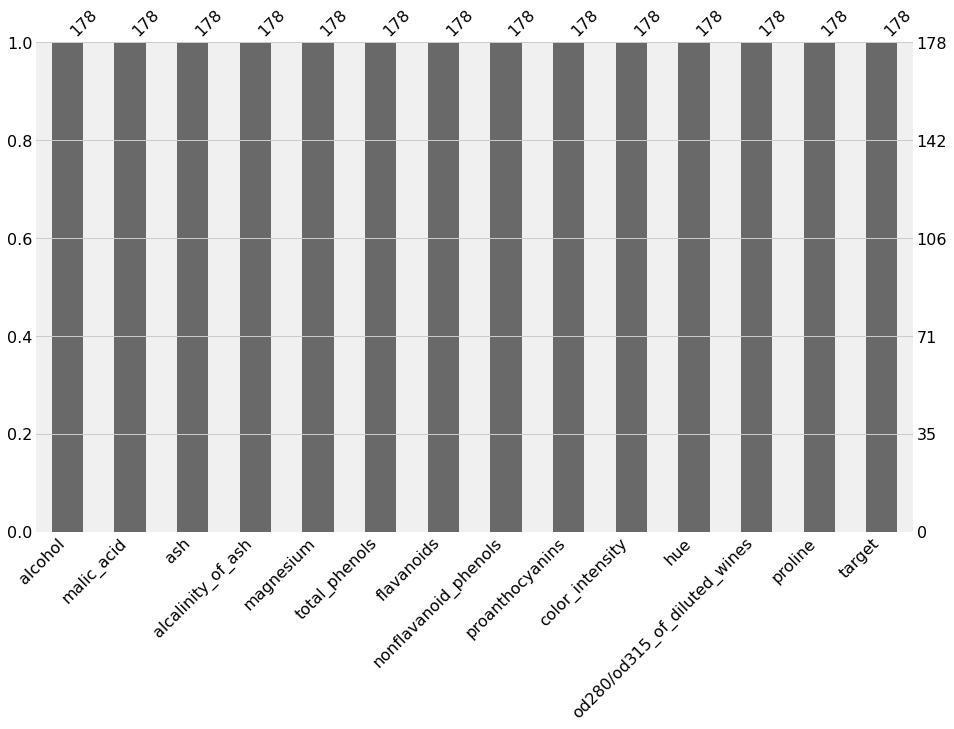

In [4]:
msno.bar(df, figsize=(14, 9))

## Spliting data

In [5]:
data = df.drop(columns=['target'])
target = df.target

In [6]:
target.value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=.4
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((106, 13), (106,), (72, 13), (72,))

## VarianceThreshold
`VarianceThreshold` allows us to set a minimum threshold for an accepted variance in each feature.

In [8]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0
150,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0


In [9]:
X_train.shape, X_test.shape

((106, 13), (72, 13))

In [10]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)
vt.fit(X_train)

X_train = X_train.iloc[:, vt.get_support()]
X_test = X_test.iloc[:, vt.get_support()]

In [11]:
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0
119,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0
136,12.25,4.72,2.54,21.0,89.0,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.0
150,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0


In [12]:
X_train.shape, X_test.shape

((106, 13), (72, 13))

In [13]:
pd.DataFrame(
    {
        'Feature': wine.feature_names,
        'Variance': vt.variances_,
    }
).sort_values('Variance', ascending=True)

,Feature,Variance
7,nonflavanoid_phenols,0.015927
10,hue,0.052638
2,ash,0.073274
8,proanthocyanins,0.355674
5,total_phenols,0.382770
11,od280/od315_of_diluted_wines,0.520644
0,alcohol,0.671885
6,flavanoids,1.019246
1,malic_acid,1.223215
9,color_intensity,6.207960


- Unlike the other feature selection methods we are going to see in a bit, this one does not use data labels when selecting features. This is useful when dealing with unlabeled data, as in unsupervised learning scenarios. 
- The fact that it is label-agnostic also means that a low variance feature might still correlate well with our labels and removing it is a mistake.
- The variance, just like the mean, is scale-dependent. A list of numbers from 1 to 10 has a variance of 8.25, while the list of 10, 20, 30,...100 has a variance of 825.0. We can clearly see this in the variance of proline. This makes the numbers in our table incomparable and makes it hard to pick a correct threshold.
One idea may be to scale your data before calculating its variance. However, keep in mind that you cannot use StandardScaler since it deliberately unifies the variance of all features. So, I would find MinMaxScaler more meaningful here.

## Filters
Now that our data comes with labels, it makes sense to use the correlation between each feature and the labels to decide which features are more useful for our model. This category of feature-selection algorithms deals with each individual feature and measures its usefulness in relation to the label; this algorithm is called filters. In other words, the algorithm takes each column in x and uses some measure to evaluate how useful it is in predicting y. Useful columns stay, while the rest are removed. The way that usefulness is measured is what differentiates one filter selector from the other. For the sake of clarity, I am going to focus on two selectors here since each one has its roots in a different scientific field, and understanding them both serves as a good foundation for future concepts. The two concepts are ANOVA (F-values) and mutual information.

### f-regression and f-classif
As its name suggests, f_regression is used for feature selection in regression tasks. f_classif is its classification cousin. f_regression has its roots in the field of statistics. Its scikit-learn implementation uses the Pearson correlation coefficient to calculate the correlation between each column in x and y. The results are then converted into Fvalues and P-values, but let's keep that conversion aside since the correlation coefficient is the key here. We start by subtracting the mean values for each column from all the values in the same column, which is similar to what we did in StandardScaler, but without dividing the values by their standard deviation. Then, we calculate the correlation coefficient using the following formula:
## $$ r_{xy} = \frac{Σ (x \times y)}{Σx² \times Σy²} $$

In [14]:
from sklearn.feature_selection import f_classif

f, p = f_classif(X_train, y_train)

This approach has its roots in a different scientific field called information theory. This field was introduced by Claude Shannon to solve issues relating to signal processing and data compression. When we send a message made up of zeros and ones, we may know the exact content of this message, but can we actually quantify the amount of information this very message carries? Shannon solved this problem by borrowing the concept of entropy from thermodynamics. Further down the line comes the concept of mutual information. It quantifies the amount of information obtained about one variable when observing another variable. The formula for mutual information is as follows:

## $$ MI = ΣΣP(x,y) \times log\frac{P(x,y)}{P(x) \times P(y)} $$  

- P(x) is the probability of x taking a certain value, as is P(y) for y.
- P(x, y) is known as joint probability, which is the probability of both x and y taking a specific pair of values.
- P(x, y) only equals the product of P(x) * P(y) if x and y are independent. Otherwise, its value is more or less than their product, depending on whether x and y are positively or negatively correlated.